Name: Kesse Asante

Labpartner(s)

In [1]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import xarray as xr 

# Class 5.2

In this lab you will learn about functions, and apply this to your datasets. Next week we will have present your work day again, see below for details. Hopefully the material is building to the point where it is not all foriegn and you will feel a bit more confident.

# Warmups 5.2

Let's practice for loops and logical control

**W.1** Complete practice python (practicepython.org) Exercise 4:

Create a program that asks the user for a number and then prints out a list of all the divisors of that number. (If you don’t know what a divisor is, it is a number that divides evenly into another number. For example, 13 is a divisor of 26 because 26 / 13 has no remainder.)

In [7]:
Number = int(input("Choose a number to divide: "))
List = list(range(1, Number+1))
Divisorlist = [] #always inintialize
for num in List:
    if Number % num == 0:
        Divisorlist.append(num)
        
print(Divisorlist)

Choose a number to divide:  26


[1, 2, 13, 26]


**W.2** Complete practice python Exercise 5: 

Take two lists, say for example these two:

  a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

  b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

and write a program that returns a list that contains only the elements that are common between the lists (without duplicates). Make sure your program works on two lists of different sizes.

Extras:

Randomly generate two lists to test this

Write this in one line of Python (don’t worry if you can’t figure this out at this point)

In [9]:
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
print(list(set(a) & set(b)))

[1, 2, 3, 5, 8, 13]


In [26]:
#random list
c = np.random.rand(10)
d = np.random.rand(12)
print(list(set(c) & set(d)))

[]


# Lecture 5.2

### Agenda:

- Questions
- Functions!


### Questions

### Functions

Functions are super-useful for doing repetative tasks. You have been using pre-defined functions constantly, when you define arrays, make a plot, or analyse data. Now you are going to learn to write your own.

For more information on functions and documenting:
- http://scipy-lectures.org/intro/language/functions.html?highlight=functions
- https://realpython.com/documenting-python-code/


Basic syntax:

In [27]:
# first you define the function

def function_name():
    # some code that does something
    print('Inside the function')

In [28]:
# then you call the function
function_name()

Inside the function


Note that defined funtions show up using whos

In [29]:
whos

Variable        Type        Data/Info
-------------------------------------
Divisorlist     list        n=4
List            list        n=26
Number          int         26
a               list        n=11
b               list        n=13
c               ndarray     10: 10 elems, type `float64`, 80 bytes
d               ndarray     12: 12 elems, type `float64`, 96 bytes
function_name   function    <function function_name at 0x176f16340>
np              module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
num             int         26
pd              module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt             module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
xr              module      <module 'xarray' from '/U<...>ages/xarray/__init__.py'>


That's a really useless function, let's make a better one.

In [30]:
# usually you want to pass a varible of some sort to the function to manipulate

def circle_area(radius):
    area = 3.14*radius**2
    return area   # the return statement means that the function will return that variable

In [31]:
circle_area(5)

78.5

What happens if I don't add the required input?

Answer: You get an error.

In [38]:
circle_area()

TypeError: circle_area() missing 1 required positional argument: 'radius'

What happens if I omit the return statement?

Amswer: Python gives you no output.

In [39]:
def circle_area2(radius):
    area = 3.14*radius**2

In [40]:
circle_area2(5)

How do I save the function output to a variable?

In [44]:
# To save the function to a variable
radius = 10
area_of_circle = circle_area(radius)
area_of_circle

314.0

Does the area variable inside the function exist outside of it?

Answer: NO

In [45]:
whos

Variable         Type        Data/Info
--------------------------------------
Divisorlist      list        n=4
List             list        n=26
Number           int         26
a                list        n=11
area_of_circle   float       314.0
b                list        n=13
c                ndarray     10: 10 elems, type `float64`, 80 bytes
circle_area      function    <function circle_area at 0x176f162a0>
circle_area2     function    <function circle_area2 at 0x176f17380>
d                ndarray     12: 12 elems, type `float64`, 96 bytes
function_name    function    <function function_name at 0x176f16340>
np               module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
num              int         26
pd               module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt              module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
radius           int         10
xr               module      <module 'xarray' from '/U<...>ag

In [46]:
area

NameError: name 'area' is not defined

Note I also could have made my function like this:

In [47]:
def circle_area4(radius):
    return 3.14*radius**2

In [48]:
circle_area4(5)

78.5

In [49]:
circle_area4(-5)

78.5

### Parsing for bad input

Note my above function will work even if the input is negative, which is not reasonable. So I probably want to include a statement that checks if the input is weird.

In [50]:
def circle_area5(radius):
    # put in an if statement to handle bad inputs
    if radius <= 0:
        print("Error: radius must be a positive number")
        return
    return 3.14*radius**2

In [51]:
circle_area5(-1)

Error: radius must be a positive number


### Using packages within functions

We can also have import statements within a function, but this can slow the function down if the package is not loaded already

In [52]:
def circle_area6(radius):
    if radius <= 0:
        print('Error: radius needs to be positive')
        return # exit the function
    
    import numpy as np
    
    return np.pi*radius**2

In [53]:
circle_area6(3) # note this is a much more accurate

28.274333882308138

We can have the function inputs have pre-defined default values, so that if you don't pass a variable it will use the default

In [54]:
def circle_area7(radius = 3):
    import numpy as np #import numpy so we can use the more exact value of pi
    
    return np.pi*radius**2

In [57]:
circle_area7()

28.274333882308138

In [58]:
circle_area7() # no argument given, so uses radius = 3 by default

28.274333882308138

Is numpy imported outside the function? Let's check

In [59]:
np.pi

3.141592653589793

In [60]:
whos

Variable         Type        Data/Info
--------------------------------------
Divisorlist      list        n=4
List             list        n=26
Number           int         26
a                list        n=11
area_of_circle   float       314.0
b                list        n=13
c                ndarray     10: 10 elems, type `float64`, 80 bytes
circle_area      function    <function circle_area at 0x176f162a0>
circle_area2     function    <function circle_area2 at 0x176f17380>
circle_area4     function    <function circle_area4 at 0x176f14a40>
circle_area5     function    <function circle_area5 at 0x176f17c40>
circle_area6     function    <function circle_area6 at 0x176f14680>
circle_area7     function    <function circle_area7 at 0x176f15620>
d                ndarray     12: 12 elems, type `float64`, 96 bytes
function_name    function    <function function_name at 0x176f16340>
np               module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
num              int   

In [61]:
# can our function handle lists? Let's check
r = [1,2,3]
circle_area7(r)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [62]:
# can our function handle arrays?

rnp = np.array(r)
circle_area7(rnp)

# what type of variable did the function return?

array([ 3.14159265, 12.56637061, 28.27433388])

### It is very useful to add some documentation string info to your functions

In [63]:
def circle_area7(radius = 3):
    """ Returns the area of a circle given the radius. 
    Assumes the radius is 3 if not supplied. """
    import numpy as np
    
    return np.pi*radius**2

Now my note in the triple double quotes shows up as a docstring

In [64]:
np.pi?

Type:        float
String form: 3.141592653589793
Docstring:   Convert a string or number to a floating point number, if possible.

In [65]:
circle_area7?

Signature: circle_area7(radius=3)
Docstring:
Returns the area of a circle given the radius. 
Assumes the radius is 3 if not supplied. 
File:      /var/folders/tw/nc3m_87d0n35psdw8fltd0lr0000gn/T/ipykernel_42903/967664329.py
Type:      function

There is a standard practice in programming to write out the Parameters (inputs/arguments) and Returns (output) in the docstring. Let's look a this for a predefined function and then make if for our simple function.

In [66]:
np.max?

Signature:
np.max(
    a,
    axis=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Docstring:
Return the maximum of an array or maximum along an axis.

Parameters
----------
a : array_like
    Input data.
axis : None or int or tuple of ints, optional
    Axis or axes along which to operate.  By default, flattened input is
    used.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, the maximum is selected over multiple axes,
    instead of a single axis or all the axes as before.
out : ndarray, optional
    Alternative output array in which to place the result.  Must
    be of the same shape and buffer length as the expected output.
    See :ref:`ufuncs-output-type` for more details.

keepdims : bool, optional
    If this is set to True, the axes which are reduced are left
    in the result as dimensions with size one. With this option,
    the result will broadcast correctly against the input array.

    If the default value is p

In [67]:
def circle_area7(radius = 3):
    """ Returns the area of a circle given the radius. 
    
    Parameters
    ----------
    radius: array like, radius of the circle
    Assumes the radius is 3 if not supplied.
    
    Returns
    -------
    area: ndarray or scalar
    Returns the area for the given radii
    
    """
    
    import numpy as np
    
    return np.pi*radius**2

In [68]:
circle_area7?

Signature: circle_area7(radius=3)
Docstring:
Returns the area of a circle given the radius. 

Parameters
----------
radius: array like, radius of the circle
Assumes the radius is 3 if not supplied.

Returns
-------
area: ndarray or scalar
Returns the area for the given radii
File:      /var/folders/tw/nc3m_87d0n35psdw8fltd0lr0000gn/T/ipykernel_42903/1644116025.py
Type:      function

# Lab 5.2

**E.1** Complete Introduction to Functions in Python Ch 1 (you can do Ch 2-3 if you are very keen, but this is not required)


**E.2** Make notes for yourself on progamming tecniques and commands you learned in the datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

def raise_to_power(value1, value2):
  
    new_value = value1 ** value2
    
    return new_value
    
result = raise_to_power(2, 3)

result

Define shout_all with parameters word1 and word2
def shout_all(word1, word2):
    
    # Concatenate word1 with '!!!': shout1
    shout1 = word1 + '!!!'
    
    # Concatenate word2 with '!!!': shout2
    shout2 = word2 + '!!!'
    
    # Construct a tuple with shout1 and shout2: shout_words
    shout_words = (shout1, shout2)

    # Return shout_words
    return shout_words

Pass 'congratulations' and 'you' to shout_all(): yell1, yell2
yell1, yell2 = shout_all('congratulations', 'you')

print(yell1)
print(yell2)


### This week's project:

**E.3** Write two functions that work on your dataset (you can use the same dataset you plotted previously or a different one). The first function will do some sort of manipulation (e.g., removing bad data, subsetting) or calculation/analysis, the second will be a plotting function. The idea here is that if you had another datafile that was similar, you could use the functions to do the programming tasks again easily. You will present these to the class next week, similar to how you presented your plots. 

Add 1-2 slides here: https://lsu.box.com/s/6qz51fijd4sc1ne175w3j7e5lxmk7x0l

#### Data Stats Function

In [77]:
def calculate_statistics(data, column_name):
    stats = {'mean': data[column_name].mean(),
        'std_dev': data[column_name].std(),
        'max': data[column_name].max(),
        'min': data[column_name].min()}
    return stats

#### Single Plots 

In [82]:
def sing_plot(data, column_name, label, title=True, color=True, ylabel=True):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data.index, data[column_name], color=color, label=label)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend()
    plt.show()

#### Multiple Plots 

In [83]:
def multiple_plots(d1, d2, column_d1, column_d2,
                   label_d1, label_d2,
                   color_d1, color_d2, title=True, ylabel=True):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(d1.index, d1[column_d1], color=color_d1, label=label_d1)
    ax.plot(d2.index, d2[column_d2], color=color_d2, label=label_d2)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend()
    plt.show()

In [84]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
f_lidar = '/Users/new/Downloads/lidar_winds.csv'
d_lidar = pd.read_csv(f_lidar)

In [86]:
d_lidar['timestamp'] = pd.to_datetime(d_lidar['timestamp'])  
d_lidar = d_lidar.set_index('timestamp') 
d_lidar  

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296
...,...,...,...,...,...,...,...,...,...,...
2021-03-21 23:10:00,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
2021-03-21 23:20:00,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
2021-03-21 23:30:00,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883


In [87]:
f_buoy = '/Users/new/Downloads/buoy_data.csv'
d_buoy = pd.read_csv(f_buoy)

In [88]:
d_buoy['time'] = pd.to_datetime(d_buoy['time'])
d_buoy = d_buoy.set_index('time') 
d_buoy

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
time,,,,,,,,,,,,,
2019-01-01 00:50:00,135,11.3,14.1,1.56,5.56,4.71,153,1018.4,8.1,7.1,999.0,99.0,99.0
2019-01-01 01:50:00,127,11.2,14.0,1.92,5.88,5.09,135,1016.6,8.3,7.1,999.0,99.0,99.0
2019-01-01 02:50:00,137,12.7,15.3,2.23,6.25,5.22,143,1013.6,8.7,7.2,999.0,99.0,99.0
2019-01-01 03:50:00,150,13.7,16.9,2.52,6.67,5.49,148,1010.7,9.5,7.2,999.0,99.0,99.0
2019-01-01 04:50:00,168,9.5,11.2,2.77,7.14,5.75,141,1010.0,10.2,7.2,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,323,7.7,9.8,99.00,99.00,99.00,999,1024.0,999.0,9.0,999.0,99.0,99.0
2020-12-31 23:20:00,328,8.0,10.1,99.00,99.00,99.00,999,1024.2,999.0,9.0,999.0,99.0,99.0
2020-12-31 23:30:00,328,8.1,11.0,99.00,99.00,99.00,999,1024.1,999.0,9.0,999.0,99.0,99.0


In [89]:
#To replace "99" with "NaN", type 

d_buoy = d_buoy.replace(99, np.nan)

In [90]:
d_buoy = d_buoy.loc['2019-8-12':]
d_lidar = d_lidar.loc[:'2020-12-31']

#### Using the Data Stats Function

In [96]:
Buoy_Stats = calculate_statistics(d_buoy, 'WSPD')
print(f"Buoy Statistics: {Buoy_Stats}")

Buoy Statistics: {'mean': 6.471401420426128, 'std_dev': 3.3217252099744536, 'max': 25.1, 'min': 0.0}


In [97]:
Lidar_Stats = calculate_statistics(d_lidar, 'wspd18m')
print(f"Lidar Statistics: {Lidar_Stats}")

Lidar Statistics: {'mean': 8.244364685512465, 'std_dev': 4.015389567076979, 'max': 25.4051, 'min': 0.5016}


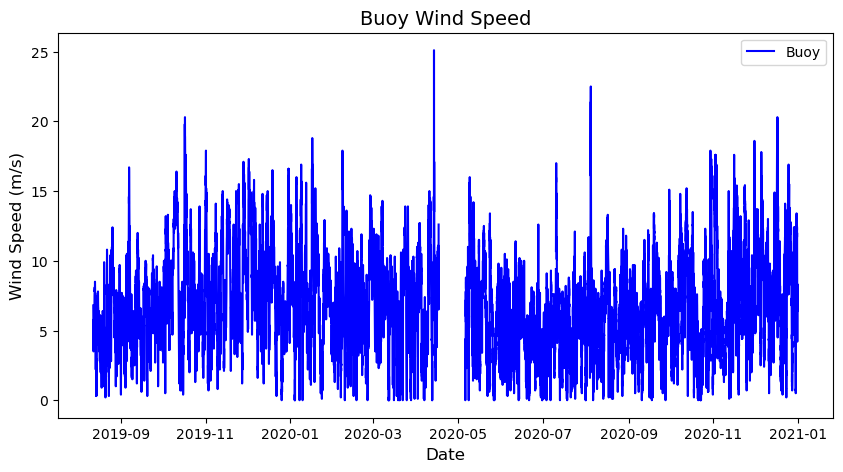

In [100]:
sing_plot(d_buoy, 'WSPD', label='Buoy', color='blue', title='Buoy Wind Speed', ylabel='Wind Speed (m/s)')

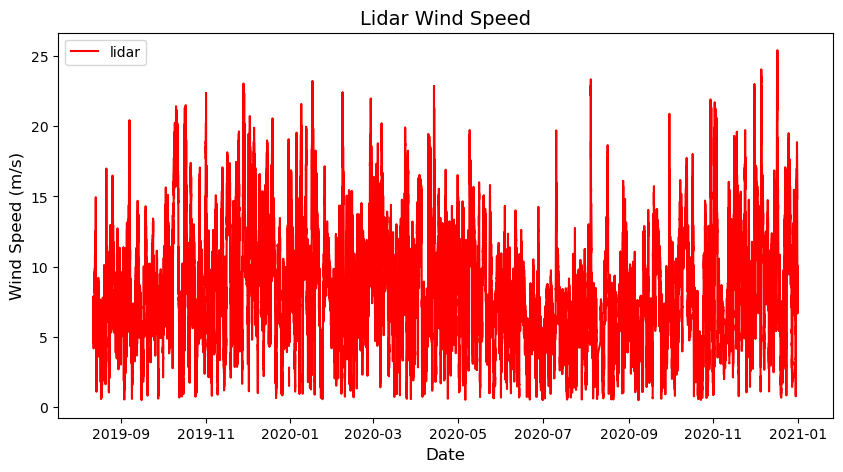

In [104]:
sing_plot(d_lidar, 'wspd18m', label='lidar', color='red', title='Lidar Wind Speed', ylabel='Wind Speed (m/s)')

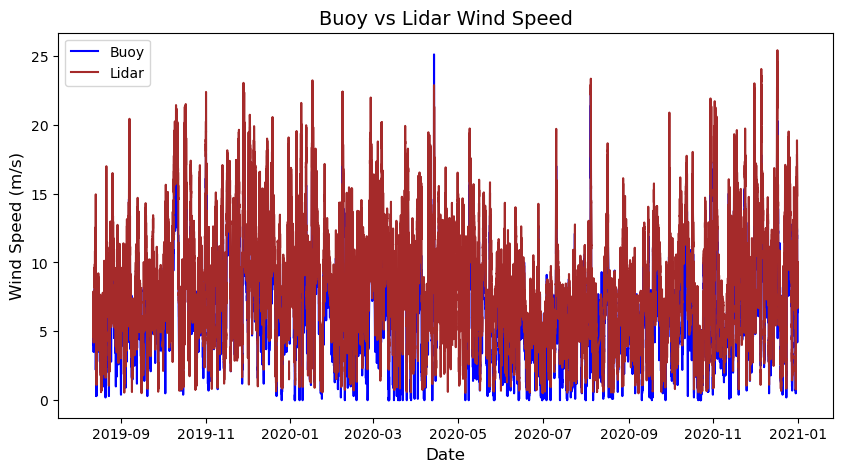

In [110]:
multiple_plots(d_buoy, d_lidar, 'WSPD', 'wspd18m',
                   label_d1='Buoy', label_d2='Lidar',
                   color_d1='blue', color_d2='brown', title='Buoy vs Lidar Wind Speed', ylabel='Wind Speed (m/s)')